# Introduction to Machine Learning: PCAM challenge

## Setup

In order to be ready to jump in to the project, you need access to the data for the challenge and should load needed packages (and install them if colab or your computer don't have them installed.)

### Download the data

In [1]:
# download the dataset into a newly created folder called data
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_test_meta.csv
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_test_x.h5
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_test_y.h5
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_train_meta.csv
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_train_x.h5
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_train_y.h5
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_valid_meta.csv
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_valid_x.h5
!wget -P data/pcam https://zenodo.org/record/7866648/files/camelyonpatch_level_2_split_valid_y.h5

In [5]:
# you might have to change this prefix to access your data depending on what your working directory is
#import os
#print(os.getcwd())

data_prefix = 'data'

/Users/dbm829/Documents/work/courses/IntroToML/projects/histopathology_images


### Imports and installs

In [2]:
#!pip install torchvision
#!pip install h5py
import torch
import torchvision
import torch.nn as nn

## The data

This dataset can be troublesome to automatically download depending on Google Drive's daily download quota. It is also not the smallest (> 7GB), so we have prepared a subset that you can download. I recommend creating a project folder (on your machine or colab) and save the data in that directory under `data`.

In [6]:
# Load the data splits
# this dataset requires the h5py package
pcam_data_train = torchvision.datasets.PCAM(
    root=data_prefix,
    split='train',
    download=False,
    transform=torchvision.transforms.ToTensor() # otherwise the data is a PIL image
)
pcam_data_val = torchvision.datasets.PCAM(
    root=data_prefix,
    split='val',
    download=False,
    transform=torchvision.transforms.ToTensor()
)
pcam_data_test = torchvision.datasets.PCAM(
    root=data_prefix,
    split='test',
    download=False,
    transform=torchvision.transforms.ToTensor()
)

### First time: getting to know the data

Datasets are often structured a little differently. At the beginning of a project, it helps to familiarize oneself with its structure.

In [7]:
# printing the dataset will give you information on how many samples it has, where it is stored and what transformations are applied
pcam_data_train

Dataset PCAM
    Number of datapoints: 13108
    Root location: data
    StandardTransform
Transform: ToTensor()

In [8]:
# data from pytorch is often a tuple of (data, label)

# have a look at the first sample
print("data of first sample is stored as ", type(pcam_data_train[0]), " with length ", len(pcam_data_train[0]))
print("the two elements of the tuple are data and label: ", [type(x) for x in pcam_data_train[0]])

data of first sample is stored as  <class 'tuple'>  with length  2
the two elements of the tuple are data and label:  [<class 'torch.Tensor'>, <class 'int'>]


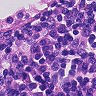

In [9]:
# if you want to visualize the data, you can convert it back to a PIL image

torchvision.transforms.ToPILImage()(pcam_data_train[0][0])

In [10]:
# what is the size of these images?

print(pcam_data_train[0][0].shape)
# this image has 3 channels (RGB) and is 96x96 pixels

# the label is binary and indicates the presence of metastatic tissue
print(pcam_data_train[0][1])

torch.Size([3, 96, 96])
0


In [11]:
# the label is binary and indicates the presence of metastatic tissue

# how many cancer samples are in the data?

all_labels = [x[1] for x in pcam_data_train]
print(sum(all_labels), ' out of ', len(all_labels), ' samples are from cancer')

6542  out of  13108  samples are from cancer
